<a href="https://colab.research.google.com/github/oObelix/DataScience/blob/master/Jun_ML_Linear_Regression_II_HW_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Урок 8. Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=10)
# -- ВАШ КОД ТУТ --

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# для регрессии
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.spatial import distance

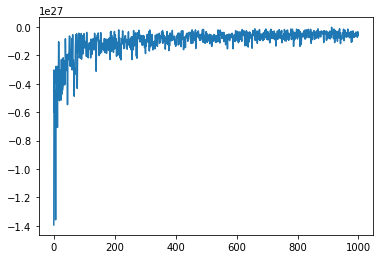

In [ ]:
sgd_regressor = SGDRegressor(#learning_rate='constant', eta0=0.015, 
                             fit_intercept=True, random_state=42)
w_current = np.random.random(13)
epsilon = 0.001
weight_evolution = []
r2_evolution = []
for step in list(range(1000)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    # print(w_current)
    # print(type(sgd_regressor.coef_))
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1] < epsilon:
        print("Итарации остановлены на шаге %d" % step); break
    r2_evolution.append(r2_score(y_test, sgd_regressor.predict(X_test)))
    w_current = sgd_regressor.coef_.copy()
plt.plot(range(step + 1), r2_evolution)
plt.show()

## не удалось сойтись